## Color Identification in Images

In [67]:
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2lab, deltaE_cie76
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>


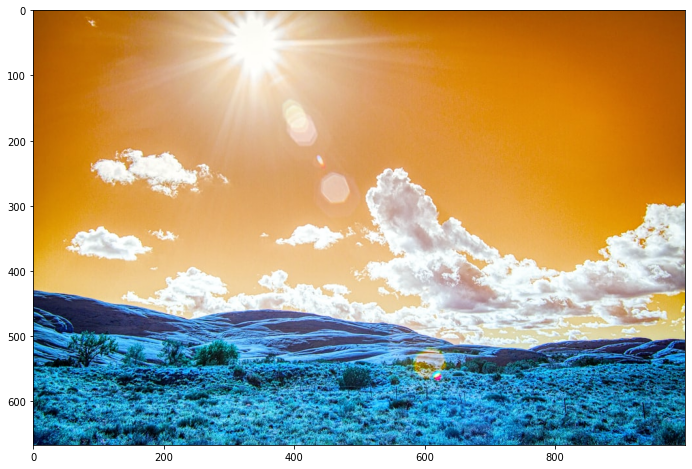

In [72]:
img = cv2.imread('pic.jpg')
print("The type of this input is {}".format(type(img))) 
plt.figure(figsize=(20,8))
plt.imshow(img)

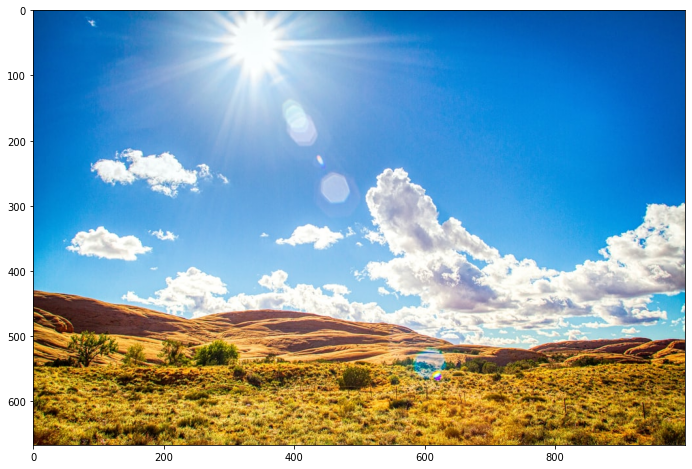

In [73]:
plt.figure(figsize=(20,8))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

[array([217.35426241, 136.80299696,  13.41203314]),
 array([ 36.12978703, 133.19621923, 183.17648496]),
 array([239.76707875, 243.18290921, 240.67106848]),
 array([226.13082769, 186.17479882, 136.06731383]),
 array([18.18619164, 44.81831108, 71.37988783]),
 array([184.86016917,  99.03671682,   2.78392844]),
 array([ 72.42917893, 173.53771672, 224.43042198]),
 array([ 30.84115037,  88.81036904, 128.96186036]),
 array([219.45049816, 206.33129881, 189.86617   ]),
 array([220.44341752, 159.09417576,  84.03731442])]

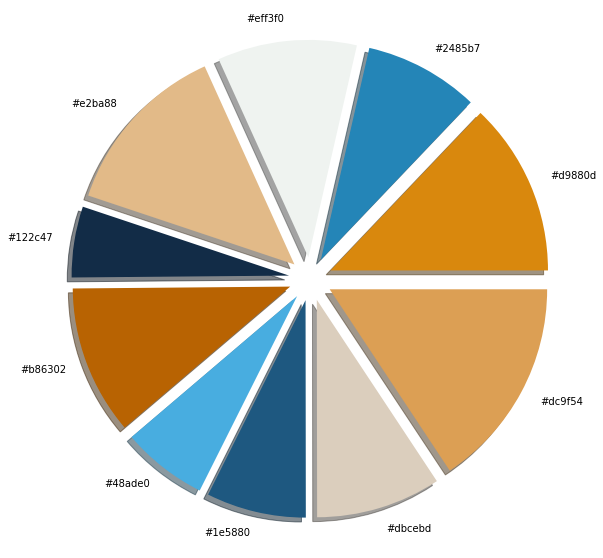

In [75]:
def rgbtohex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def get_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return image
def get_colors(image, number_of_colors, show_chart):  
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)  
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)    
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    counts = dict(sorted(counts.items()))
    ordered_colors = [center_colors[i] for i in counts.keys()]
    explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
    hex = [rgbtohex(ordered_colors[i]) for i in counts.keys()]
    rgb = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (10, 10))
        plt.pie(counts.values(),shadow=True,colors = hex, explode= explode,labels = hex)  
    return rgb
get_colors(get_image('pic.jpg'), 10, True)